In [1]:
cd ../../

/home/bluesun/PycharmProjects/tmp/BERTAP_v2


/home/bluesun/anaconda3/envs/rl/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
pwd

'/home/bluesun/PycharmProjects/tmp/BERTAP_v2'

In [3]:
from src.datasets.d4rl_utils import make_env, get_dataset

env_name = 'maze2d-large-v1'
env = make_env(env_name)
data = get_dataset(env, env_name)
data

No module named 'flow'
No module named 'carla'
pybullet build time: Nov 28 2023 23:48:36


Loading dataset...


load datafile: 100%|██████████| 8/8 [00:00<00:00, 11.31it/s]


------------[Fixing reward for Maze2D]------------
----------[Fixing last goal for Maze2D]-----------
-----------[Transposing xy for Maze2D]------------
------------[Fixing reward for Maze2D]------------


Dataset(actions: (3983273, 2), dones_float: (3983273, 1), goals: (3983273, 2), masks: (3983273, 1), next_observations: (3983273, 4), observations: (3983273, 4), rewards: (3983273, 1))

In [4]:
import numpy as np
from src.utils.ant_viz import GoalReachingMaze

render_env = GoalReachingMaze(env_name)
term_ids = np.where(data["dones_float"])[0]
term_ids[:10]

array([ 248,  452,  733, 1067, 1652, 1754, 1979, 2323, 2718, 2820])

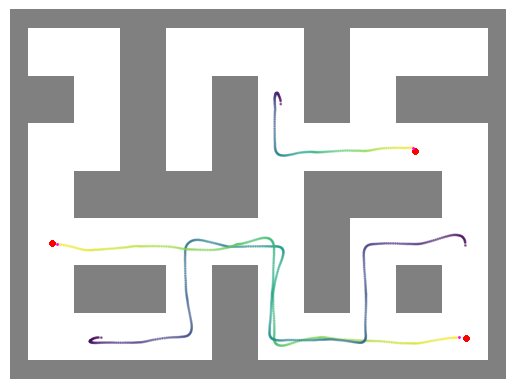

In [16]:
import matplotlib.pyplot as plt

render_env.draw()

for i in np.random.randint(0, len(term_ids), 3):
    s, t = term_ids[i-1:i+1] + 1
    c = np.linspace(0, 1, t-s)
    pos = data["observations"][s:t, :2]
    goal = data["goals"][s:t]
    rew_pos = pos[data["rewards"][s:t, 0] > 0]
    
    plt.scatter(*pos.T, c=c, cmap='viridis', alpha=0.5, s=1)
    plt.scatter(*goal.T, c='red', s=10)
    plt.scatter(*rew_pos.T, c='magenta', s=1)

plt.show()